In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Librerias de optimizacion
from scipy.optimize import minimize
from ipywidgets import interactive
from IPython.display import display

### Un vídeo muy interesante de lo que vimos la sesión pasada referente a la regresión lineal y el gradiente descendente (¡hace como mil siglos!):



*   https://www.youtube.com/watch?v=A6FiCDoz8_4

### Reto: 

Aplicar una regresión (evalua si debe ser lineal o polinómica) con lo que vimos en la clase pasada para el siguiente set de datos:

In [0]:
data_dict = {'Temperature' : [0, 20, 40, 60, 80, 100], 
             'Pressure'    : [0.0002, 0.0012, 0.0060, 0.0300, 0.0900, 0.2700]}
data = pd.DataFrame(data_dict)
data

Temperature  Pressure
0            0    0.0002
1           20    0.0012
2           40    0.0060
3           60    0.0300
4           80    0.0900
5          100    0.2700

# El problema de la clasificación:

<img src="https://www.skiphirenetwork.com/news/wp-content/uploads/2017/04/how-to-easily-classify-different-types-of-waste-min.jpg" width=600px>

Con base en lo que vimos en la última sesión, aplica un modelo de regresión líneal al siguiente dataset sintético que indica el tamaño de un tumor y si este es maligno o no:

In [0]:
data = {'Tamano'  : [9.5, 9, 8.5, 8, 6, 5.5, 5, 4.5], 
        'Maligno' : [1,   1,   1, 1, 0,   0, 0,   0]} 
df = pd.DataFrame(data) 

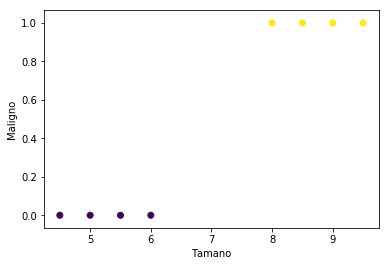

In [0]:
plt.scatter(df["Tamano"], df["Maligno"], c = df["Maligno"])
plt.xlabel("Tamano")
plt.ylabel("Maligno")
plt.show()

In [0]:
X = np.c_[np.ones(df.shape[0]), df["Tamano"].values]
y = df["Maligno"].values

In [0]:
def h_v(X, theta):
  return np.matmul(theta, X.transpose())

def costFunction_v(X, y, theta):
  h_theta = h_v(X, theta)
  return 0.5 * np.mean((h_theta - y)**2)

def gradCost_v(X, y, theta):
  h_theta = h_v(X, theta)
  return np.matmul((h_theta - y), X) / X.shape[0]

def gradientDescent_v(X, y, theta, alpha, iterations):
  theta_0 = np.array(theta, dtype = "float")
  for i in range(iterations):
    grad = gradCost_v(X, y, theta_0)
    theta_0 -= alpha * grad
  return theta_0

In [0]:
theta = gradientDescent_v(X, y, [0, 0], 0.01, 800)
print(theta)

[-0.5159983   0.15236699]


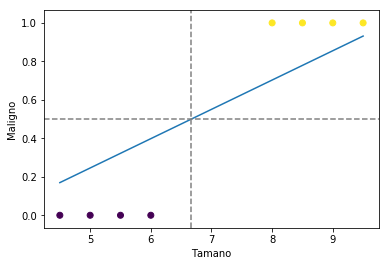

In [0]:
plt.scatter(df["Tamano"], df["Maligno"], c = df["Maligno"])
plt.plot(df["Tamano"], h_v(X, theta))
plt.axhline(0.5, color = "gray", linestyle='--')
plt.axvline((0.5 - theta[0]) / theta[1], color = "gray", linestyle='--')
plt.xlabel("Tamano")
plt.ylabel("Maligno")
plt.show()

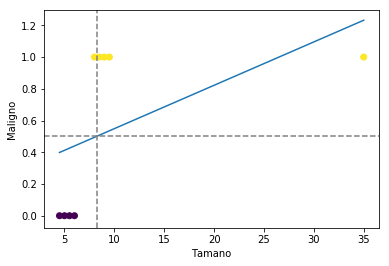

In [0]:
data = {'Tamano'  : [35, 9.5, 9, 8.5, 8, 6, 5.5, 5, 4.5], 
        'Maligno' : [1,   1,   1,   1, 1, 0,   0, 0,   0]} 
df = pd.DataFrame(data) 
df = pd.DataFrame(data) 

X = np.c_[np.ones(df.shape[0]), df["Tamano"].values]
y = df["Maligno"].values

theta = gradientDescent_v(X, y, [0, 0], 0.01, 800)

plt.scatter(df["Tamano"], df["Maligno"], c = df["Maligno"])
plt.plot(df["Tamano"], h_v(X, theta))
plt.axhline(0.5, color = "gray", linestyle='--')
plt.axvline((0.5 - theta[0]) / theta[1], color = "gray", linestyle='--')
plt.xlabel("Tamano")
plt.ylabel("Maligno")
plt.show()

Usar una función de regresión para un problema de clasificación no es una buena idea, en particular si tenemos casos atípicos como el mostrado en el ejemplo, además, la interpretación de la salida en el modelo de regresión no es clara para el caso en el que la salida sea menor que cero o mayor que uno. En conclusión, es necesario usar otra aproximación en la cual la hipótesis $h_\theta(x)$ cumpla que $0 \leq h_\theta \leq 1$, esto se puede cumplir poniendo la expresión 
$\theta\, (x^{(i)})^T
= \theta_0\,x^{(i)}_0 + \theta_1\, x^{(i)}_1 + \cdots + \theta_n\,x^{(i)}_n$, dentro de una función logística.

## Función logística:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

In [0]:
def logistic(z):
  return 1.0/(1.0 + np.exp(-z))

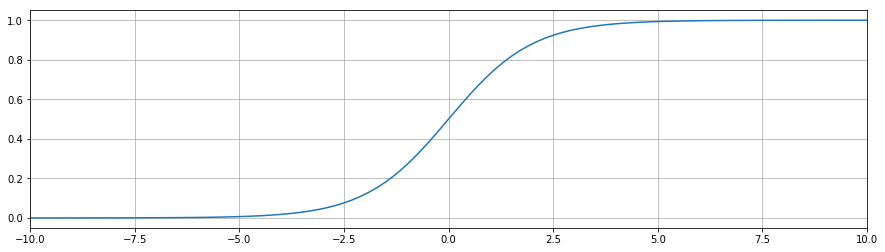

In [0]:
x = np.linspace(-10, 10, num = 100)
plt.figure(figsize=(15,4))
plt.plot(x, logistic(x))
plt.xlim(-10,10)
plt.grid()
plt.show()

## Función de Costo

La definición que vamos a usar para la función de costo de la regresión logística está definida como:

$$
J(\theta) = \sum_{i=1}^{m} \text{perdida}(h_\theta(x), y^{(i)})
$$
donde
$$
\begin{align}
\text{perdida}(h_\theta(x), y^{(i)}) &= -\log(h_\theta(x)) \quad \text{si } y = 1 \\
\text{perdida}(h_\theta(x), y^{(i)}) &= -\log(1 - h_\theta(x)) \quad \text{si } y = 0
\end{align}
$$

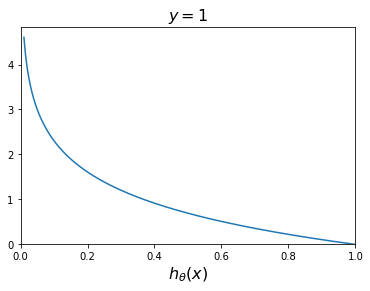

In [0]:
x = np.linspace(0.01, 1, num = 200)
plt.plot(x, -np.log(x))
plt.title("$y = 1$", fontsize=16)
plt.xlabel(r"$h_\theta(x)$",fontsize=16)
plt.xlim(0,1)
plt.ylim(bottom = 0)
plt.show()

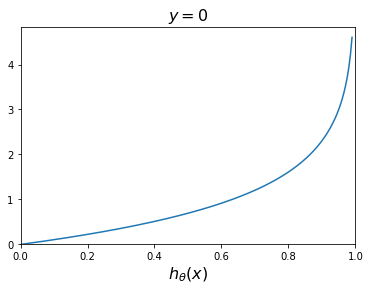

In [0]:
x = np.linspace(0, 0.99, num = 200)
plt.plot(x, -np.log(1 - x))
plt.title("$y = 0$", fontsize=16)
plt.xlabel(r"$h_\theta(x)$",fontsize=16)
plt.xlim(0,1)
plt.ylim(bottom = 0)
plt.show()

La definición para la función de perdida se puede comprimir mediante la expresión $$ -y\,\log(h_\theta(x)) - (1 - y) \,\log(1 - h_\theta(x)).$$

Con lo cual la función de costo queda:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y\,\log(h_\theta(x^{(i)})) + (1 - y) \,\log(1 - h_\theta(x^{(i)}))].
$$

Recordemos el algoritmo del gradiente descendente:

>__Repetir hasta que converja : {__
$$
\theta_j := \theta_j - \alpha \frac{\partial J}{\partial \theta_j}
$$
__}__

Aplicando la función de costo para la regresión logística se tiene de manera concreta:

>__Repetir hasta que converja : {__
$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right)
$$
__}__

Finalmente, aplicando el gradiente según lo visto en la sesión anterior, se tiene entonces:

$$
\begin{align}
\frac{\partial J}{\partial \theta_0} &= \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right) \\
\frac{\partial J}{\partial \theta_1} &= \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right) x^{(i)}
\end{align}
$$

### Reto para la casa: 

Basándote en lo visto en la sesión sobre la Regresión Lineal, aplica el gradiente descendente para la regresión logística en un problema de clasificación.

# Entrenamiento del modelo

In [0]:
# Descargando la data
!wget https://raw.githubusercontent.com/nicolasggiraldo/Curso_ML/master/Logistic_Regression/data/ex2data1.txt

--2019-09-06 14:25:27--  https://raw.githubusercontent.com/nicolasggiraldo/Curso_ML/master/Logistic_Regression/data/ex2data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘ex2data1.txt’

ex2data1.txt        100%[===================>]   3.69K  --.-KB/s    in 0s      

2019-09-06 14:25:27 (62.2 MB/s) - ‘ex2data1.txt’ saved [3775/3775]



## Datos

Supongamos que tenemos datos históricos de aspirantes a una Universidad y que se desea construir un modelo que indique la propensión de un aplicante a pasar a dicha Universidad dado el resultado de dos exámenes que se realizan.

In [0]:
# Carguemos el dataframe con la data de entrenamiento:

data = pd.read_csv("/content/ex2data1.txt",
                   names = ["Exam_1", "Exam_2", "y"])

data.head()

Exam_1     Exam_2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1

Hagamos una gráfica de los datos:

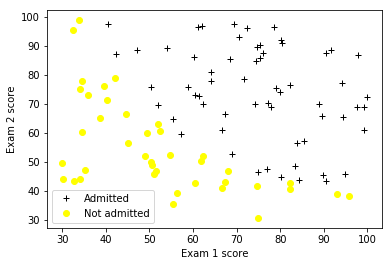

In [0]:
plt.plot(data[data["y"] == 1]["Exam_1"], 
         data[data["y"] == 1]["Exam_2"], 
         "+", label = "Admitted", color = "black")
plt.plot(data[data["y"] == 0]["Exam_1"], 
         data[data["y"] == 0]["Exam_2"], 
         'o', label = "Not admitted", color = "yellow")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc = "lower left")
plt.show()

## Hipótesis

Procedamos a construir la hipótesis, para esto debemos construir previamente una función que calcule la función sigmoide:

In [0]:
X = np.c_[np.ones(data.shape[0]), data[["Exam_1","Exam_2"]].values]
y = data["y"].values

X[:5,:]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

### Nota:
Recordar que para este caso $h_\theta(x) = \theta_0\,x_0 + \theta_1\, x_1 + \theta_2\,x_2$

In [0]:
def sigmoid(z):
    return 1./(1.+np.exp(-z))

def h(theta, X):
    return sigmoid(np.matmul(X, theta))

#h([0,0,0], np.c_[np.ones(data.shape[0]), data[["Exam_1","Exam_2"]].values])

Con la hipótesis procedamos a definir el costo:

In [0]:
def costFunction(theta, X, y):
    h_theta = h(theta, X)
    return -np.mean(y * np.log(h_theta) + (1 - y) * np.log(1 - h_theta + 1e-6))

cost= costFunction([-24,0.2,0.2], X = X, y = y)
print(cost)

0.21832924203965537


Procedamos a encontrar los parámetros óptimos que minimizan la función de costo:

In [0]:
min_val = minimize(lambda theta : costFunction(theta, X = X, y = y), [0,0,0])
theta_sol = min_val.x
theta_sol

array([-25.16127638,   0.20623138,   0.20147109])

### Nota:

Noten que no usaré gradiente descendente aquí, ¡este es un reto suyo!

## La frontera de decisión

Para definir nuestros valores discretos 0 o 1, podemos aplicar la siguiente regla:

$$
\begin{align}
h_\theta(x) \geq 0.5 &\to y = 1 \\
h_\theta(x) < 0.5     &\to y = 0
\end{align}
$$

Esto se da cuando $\theta_0\,x_0 + \theta_1\, x_1 + \cdots + \theta_n\,x_n = 0$, lo cual define la llamada frontera de decisión, esta es una línea que separa los casos en donde se clasifica $\hat{y}=0$ o  $\hat{y}=1$.

A continuación, se muestra la frontera de decisión para la solución obtenida:

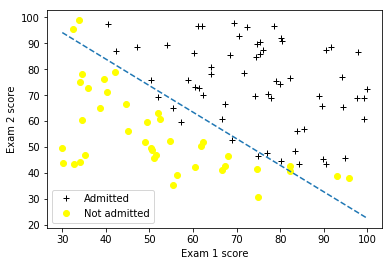

In [0]:
plt.plot(data[data["y"] == 1]["Exam_1"], 
         data[data["y"] == 1]["Exam_2"], 
         "+", label = "Admitted", color = "black")
plt.plot(data[data["y"] == 0]["Exam_1"], 
         data[data["y"] == 0]["Exam_2"], 
         'o', label = "Not admitted", color = "yellow")
x1 = np.linspace(data["Exam_1"].min(), data["Exam_1"].max(), 100)
plt.plot(x1,-(theta_sol[0] + theta_sol[1] * x1) / theta_sol[2], '--')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc = "lower left")
plt.show()

## Predicción

Predigamos valores

In [0]:
def predict_logistic(theta, X):
    return h(theta, X)

In [0]:
predict_logistic(theta_sol, [1, 45, 85])

0.7762904493041266

In [0]:
# Recuerden que esta forma de crear listas al vuelo se llama "list comprehension"
predict = [1 if x >= 0.5 else 0 for x in predict_logistic(theta_sol, X)]
np.mean(predict == y)

0.89

# ¡Reto de la clase!

In [0]:
from sklearn import datasets
iris = datasets.load_iris()

In [0]:
# Variables del dataset
for i in range(len(iris.feature_names)):
  print("Col {}: {}".format(i, iris.feature_names[i]))

Col 0: sepal length (cm)
Col 1: sepal width (cm)
Col 2: petal length (cm)
Col 3: petal width (cm)


In [0]:
# Target
for i in range(len(iris.target_names)):
  print("Target {}: {}".format(i, iris.target_names[i]))

Target 0: setosa
Target 1: versicolor
Target 2: virginica


In [0]:
iris_data = iris.data
target = iris.target

In [0]:
# Cabecera de las variables
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [0]:
# Distribucion del target
print(len(target))
print()
target

150



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

En este caso vamos a clasificar un problema multiclase en vez de una clasificación binaria. Para esto usaremos la clasificación "one-vs-all".

La clasificaión one-vs-all es un método en el cual se entrenan N distintas clases binarias, cada una diseñada para identificar una clase particular. Luego, estos N clasificadores son usados en manera conjunta para definir la clase final a la que pertenece una observación dada, una regla sencilla es asignar la clase a aquella que de una mayor propensión (recomendada).

![img](https://utkuufuk.com/2018/06/03/one-vs-all-classification/one-vs-all.png)